# Oleh: Syahel Rusfi Razaba

# **Studi Kasus**
Cardiovascular desease (CVD) atau penyakit kardiovaskuler merupakan salah satu penyebab kematian nomor satu
secara global. Diestimasikan telah merenggut nyawa sekitar 18 juta jiwa setiap tahunnya atau 31% dari seluruh
penyebab kematian secara global. Empat dari lima kematian CVD diakibatkan oleh serangan jantung dan stroke,
dan sepertiganya dialami secara prematur oleh sesorang dengan usia di bawah 70 tahun.
Kegagalan jantung merupakan salah salah penyebab umum dari penyakit kardiovaskuler. Sebagai seorang
associate data scientist, Anda ditugaskan untuk melakukan prediksi terhadap kemungkinan terjadinya penyakit
jantung. Diharapkan pemodelan yang dihasilkan dapat membantu kinerja dokter dalam mendeteksi pasien dengan
penyakit jantung, sehingga dapat menolong lebih banyak orang yang berisiko tinggi terkena penyakit
kardiovaskuler.

# **Objektivitas**
*   Memprediksi kemungkinan terjadinya penyakit
jantung

# **Mengumpulkan Data**

In [ ]:
import pandas as pd # Loading module yang dibutuhkan
url = 'https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv' # url dataset raw dari github
data = pd.read_csv(url) # Loading data
print(data.shape)
data.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Understanding
*   Age: Umur pasien dalam tahun. Berperan sebagai variabel prediktor
*   Sex: Jenis kelamin pasien (M: Male, F: Female). Berperan sebagai variabel prediktor
*   ChestPainType: Tipe nyeri dada pasien (TA: Typical Angina, ATA:
Atypical Angina, NAP: Non-Anginal Pain,
ASY: Asymptomatic). Berperan sebagai variabel prediktor
*   RestingBP: Tekanan darah pasien saat sedang istirahat atau tidak melakukan aktivitas fisik yang signifikan (mm Hg). Berperan sebagai variabel prediktor
*   Cholesterol: Tingkat kolestrol pasien (mg/dl). Berperan sebagai variabel prediktor
*   FastingBS: Gula darah puasa (1: jika FastingBS > 120 mg/dl, 0: lainnya). Berperan sebagai variabel prediktor
*   RestingECG: Pengukuran aktivitas listrik jantung pada saat seseorang dalam keadaan istirahat atau tidak melakukan aktivitas fisik yang signifikan (resting electrocardiogram results [Normal:
Normal, ST: having ST-T wave abnormality (T
wave inversions and/or ST elevation or
depression of > 0.05 mV), LVH: showing
probable or definite left ventricular
hypertrophy by Estes' criteria]). Berperan sebagai variabel prediktor
*   MaxHR: Denyut jantung maksimum yang dialami pasien (Nilai numerik
antara 60 and 202). Berperan sebagai variabel prediktor
*   ExerciseAngina: Gejala angina (nyeri atau ketidaknyamanan dada) yang dipicu oleh aktivitas fisik atau latihan. Berperan sebagai variabel prediktor
*   Oldpeak: ST (Nilai numerik diukur dalam depresi). Berperan sebagai variabel prediktor
*   ST_Slope: Kemiringan segmen ST latihan puncak (Atas: upsloping, Datar: datar, Bawah: downsloping). Berperan sebagai variabel prediktor
*   HeartDisease: Penyakit jantung dengan output class (1: heart disease, 0: normal) berperan sebagai variabel target

Saya asumsikan semua variabel dalam data memiliki informasi yang bermanfaat, maka akan saya gunakan semua variabel tersebut dalam analisis.










# **Menelaah Data**

In [ ]:
data.info() # Melihat informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [ ]:
# Melihat variabel apa saja yang bertipe object
varObjects = data.select_dtypes(include = ['object'])
varObjects.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
# Mengubah tipe data object menjadi category
for col in varObjects.columns:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 55.5 KB


In [ ]:
data['FastingBS'] = data['FastingBS'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(6), float64(2), int64(4)
memory usage: 49.4 KB


In [ ]:
data['HeartDisease'] = data['HeartDisease'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(2), int64(3)
memory usage: 43.2 KB


In [ ]:
# Melihat statistik deskriptif dari data
data.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,911.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,136.809368,0.887364
std,12.988393,18.514154,109.384145,25.460334,1.066570
min,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,177.000000,200.000000,603.000000,202.000000,6.200000


In [ ]:
# Mengecek apakah ada noise pada variabel kategorik
catVar = data.select_dtypes(include = ['category'])
for col in catVar.columns:
    print(col,': ', set(data[col].unique()))

Sex :  {'F', 'M', nan}
ChestPainType :  {'NAP', 'TA', 'ASY', 'ATA'}
FastingBS :  {0, 1}
RestingECG :  {'Normal', 'LVH', 'ST'}
ExerciseAngina :  {'N', 'Y'}
ST_Slope :  {'Down', 'Flat', 'Up'}
HeartDisease :  {0, 1}


Untuk variabel kategorik sendiri tidak memiliki noise, melainkan hanya terdapat missing value di variabel 'Sex'.

In [ ]:
# Mengecek apakah ada noise pada variabel numerik
numVar = data.select_dtypes(include = ['int', 'float'])
for col in numVar.columns:
    print(col,': ', set(data[col].unique()))

Age :  {0.0, 153.0, 154.0, 155.0, 28.0, 29.0, 30.0, 31.0, 32.0, nan, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 33.0, 68.0, 69.0, 70.0, 72.0, 73.0, 74.0, 75.0, 76.0, 71.0, 77.0, 161.0, 170.0, 177.0}
RestingBP :  {128, 0, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 129, 148, 150, 152, 154, 155, 156, 158, 160, 164, 165, 170, 172, 174, 178, 180, 185, 190, 192, 200, 80, 92, 94, 95, 96, 98, 100, 101, 102, 104, 105, 106, 108, 110, 112, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127}
Cholesterol :  {0, 518, 529, 564, 85, 603, 100, 110, 113, 117, 123, 126, 129, 131, 132, 139, 141, 142, 147, 149, 152, 153, 156, 157, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 192, 193, 194, 1

In [ ]:
# Visual Python: Visualization > Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

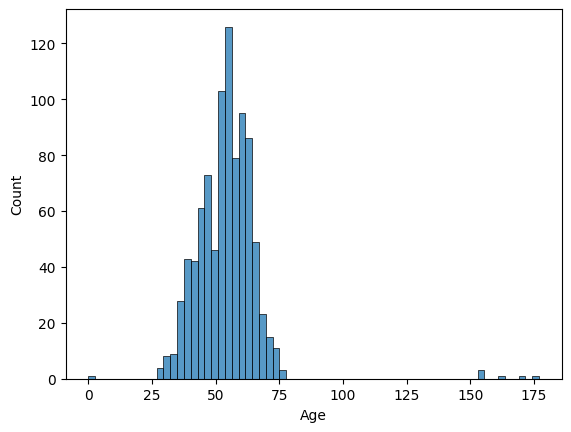

In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=data, x='Age')
plt.show()

Untuk variabel 'Age' terdapat nilai 0 yang menjadi perhatian kita. Dalam kasus ini, tentunya kita tidak boleh sembarangan menyatakan kalau 0 itu noise atau missing value, karena bisa saja itu outlier.

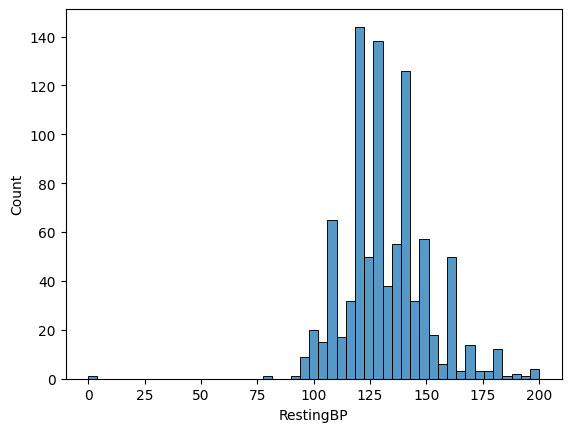

In [ ]:
sns.histplot(data=data, x='RestingBP')
plt.show()

Saya asumsikan nilai 0 merupakan noise, karena tidak mungkin seseorang memiliki tekanan darah 0.

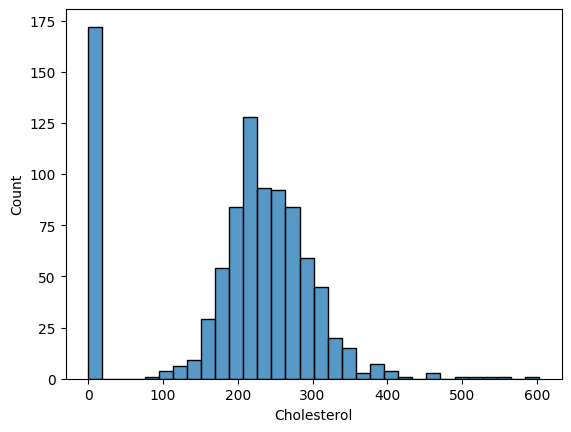

In [ ]:
sns.histplot(data=data, x= 'Cholesterol')
plt.show()

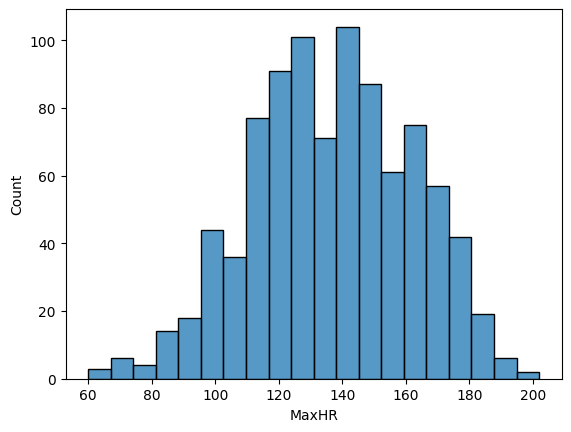

In [ ]:
sns.histplot(data=data, x= 'MaxHR')
plt.show()

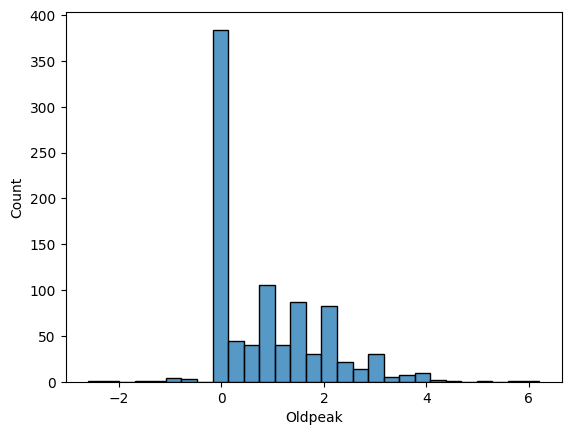

In [ ]:
sns.histplot(data=data, x= 'Oldpeak')
plt.show()

In [ ]:
# Mengecek duplikasi data
print(data.shape)
print('Jumlah data duplikat:', data.duplicated().sum())

(918, 12)
Jumlah data duplikat: 0


Mengecek Outlier

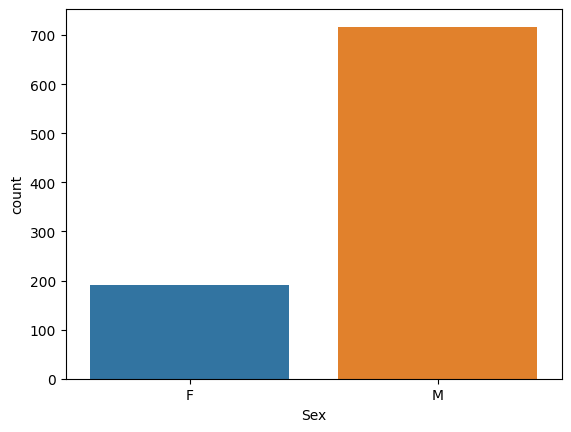

In [ ]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=data, x='Sex')
plt.show()

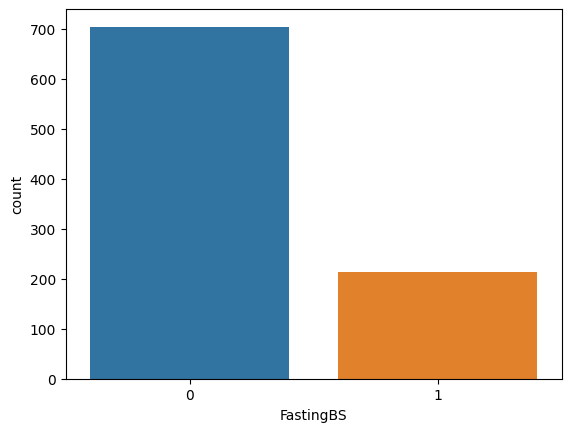

In [ ]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=catVar, x='FastingBS')
plt.show()

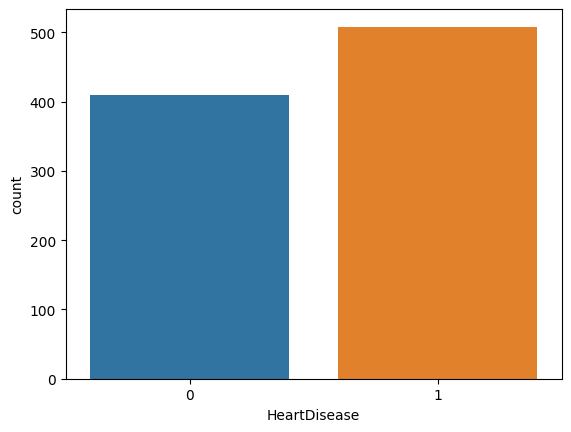

In [ ]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=catVar, x='HeartDisease')
plt.show()

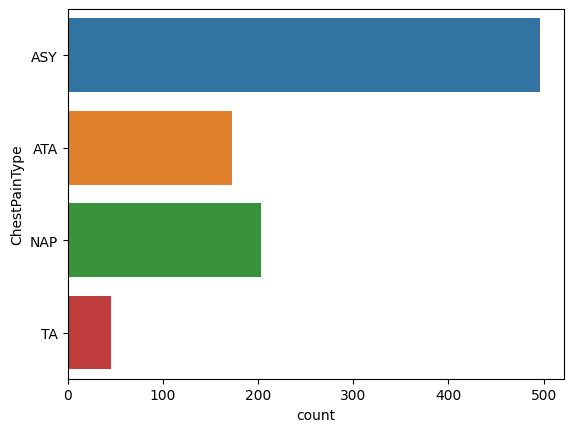

In [ ]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=catVar, y='ChestPainType')
plt.show()

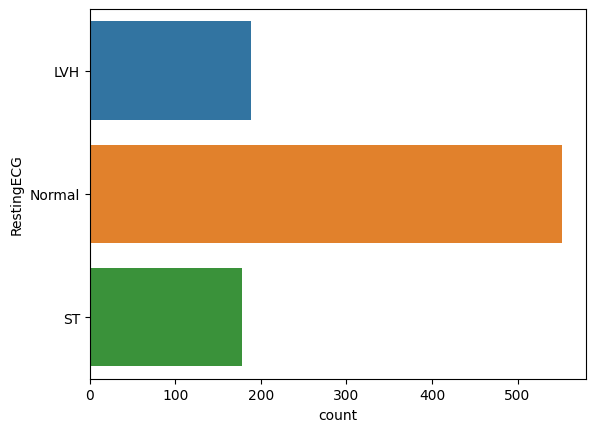

In [ ]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=catVar, y='RestingECG')
plt.show()

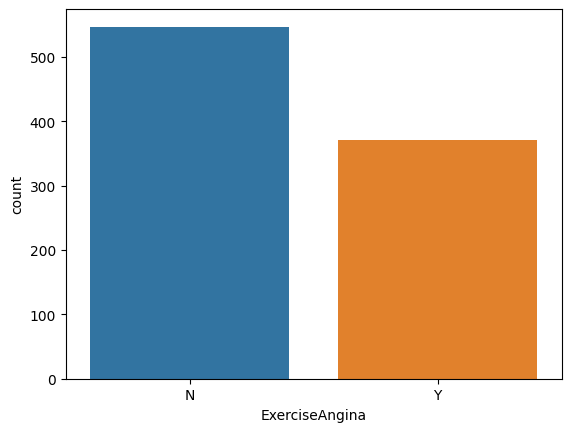

In [ ]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=catVar, x='ExerciseAngina')
plt.show()

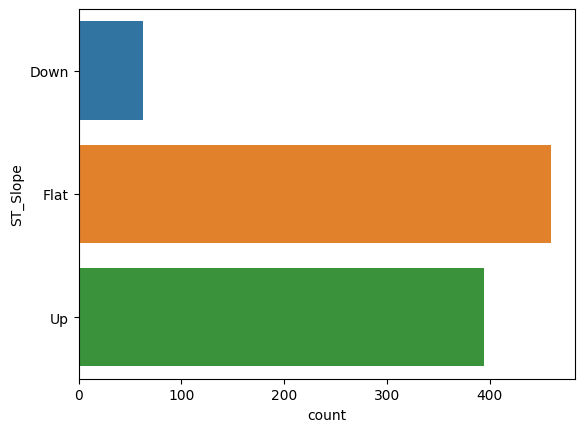

In [ ]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=catVar, y='ST_Slope')
plt.show()

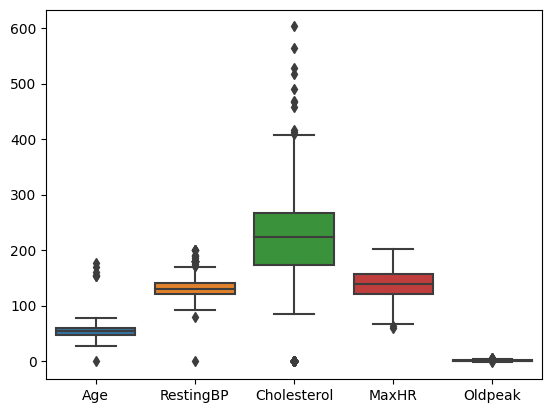

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=numVar)
plt.show()

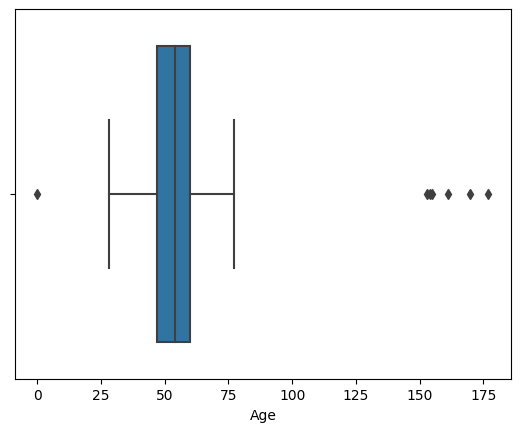

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=numVar, x='Age')
plt.show()

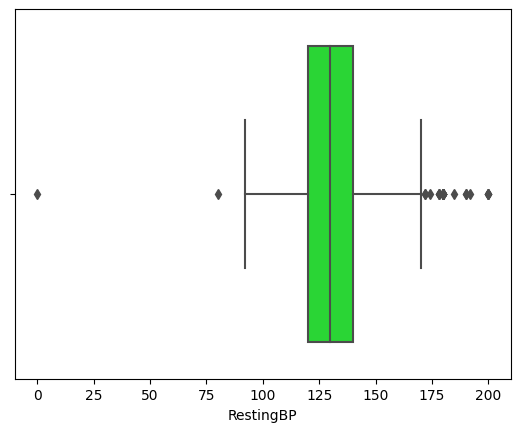

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=numVar, x='RestingBP', color='#0df21c')
plt.show()

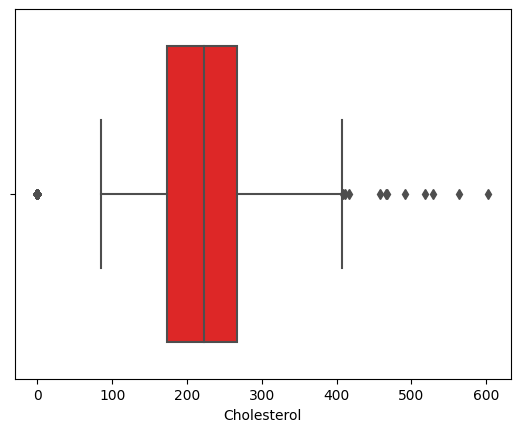

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=numVar, x='Cholesterol', color='#fb0909')
plt.show()

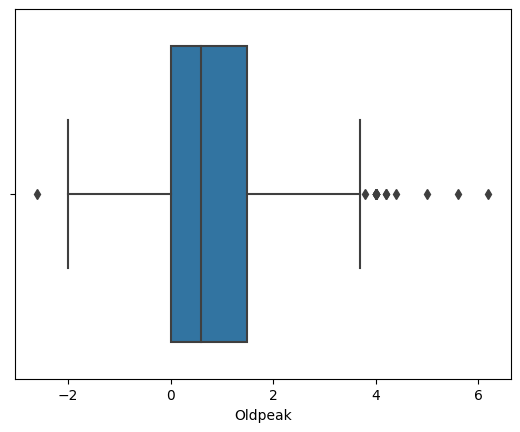

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=numVar, x='Oldpeak')
plt.show()

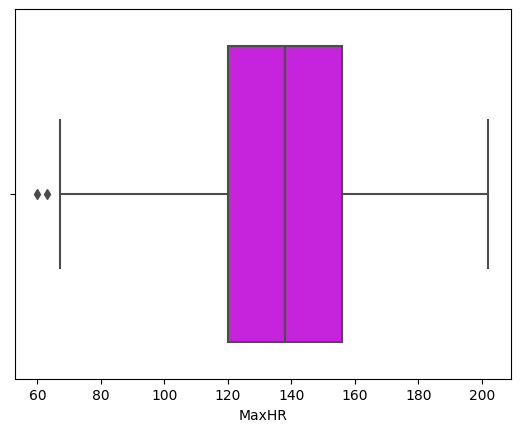

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=numVar, x='MaxHR', color='#de04fb')
plt.show()

In [ ]:
# Mengecek missing value
print(data.isnull().sum())

Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64


<ipython-input-31-f1c61e027d3b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


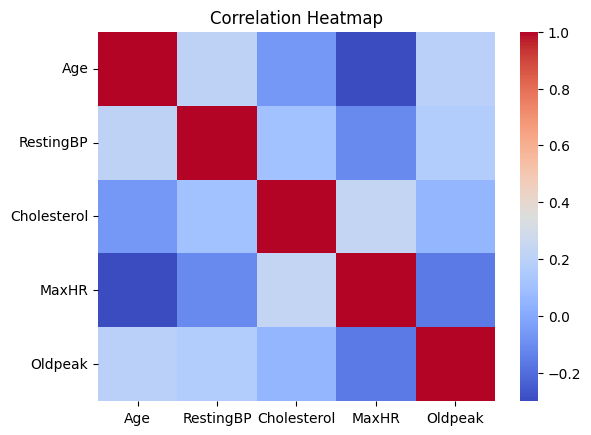

In [ ]:
df2 = pd.DataFrame(data)
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Memvalidasi Data**

Data yang telah kita lakukan preprocessing sudah valid dari setiap variabel yang ada dalam datasetnya. Dari kelengkapan dan kualitas juga sudah cukup bagus, karena bisa kita lihat data hanya sedikit mengandung missing value dan noise yang mana akan kita bersihkan selanjutnya. Sehingga valid untuk dilakukan pemodelan.

# **Menentukan Objek Data**

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(2), int64(3)
memory usage: 43.2 KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Membersihkan Data**

In [ ]:
# Menangani noise untuk variabel RestingBP
data.drop(data[(data.RestingBP == 0)].index, inplace=True)
print(data.shape)

(917, 12)


In [ ]:
# Menghilangkan missing value
data = data.dropna()
data.isnull().sum()
print(data.shape)

(901, 12)


# **Mengkonstruksi Data**

In [ ]:
for col in catVar.columns:
    if col != 'HeartDisease':
        transformasi = pd.get_dummies(data[col], prefix='')
        data = pd.concat([data, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            data.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(data.shape)
data.head()

(901, 22)


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49.0,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48.0,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54.0,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
5,39.0,120,339,170,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


Menyimpan data hasil preprocessing

In [ ]:
# Saving the preprocessed Data for future use/analysis
data.to_csv("heart_preprocessed.csv", encoding='utf8', index=False)

# **Menentukan Label Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 1 to 917
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           901 non-null    float64 
 1   RestingBP     901 non-null    int64   
 2   Cholesterol   901 non-null    int64   
 3   MaxHR         901 non-null    int64   
 4   Oldpeak       901 non-null    float64 
 5   HeartDisease  901 non-null    category
 6   _F            901 non-null    uint8   
 7   _M            901 non-null    uint8   
 8   _ASY          901 non-null    uint8   
 9   _ATA          901 non-null    uint8   
 10  _NAP          901 non-null    uint8   
 11  _TA           901 non-null    uint8   
 12  _0            901 non-null    uint8   
 13  _1            901 non-null    uint8   
 14  _LVH          901 non-null    uint8   
 15  _Normal       901 non-null    uint8   
 16  _ST           901 non-null    uint8   
 17  _N            901 non-null    uint8   
 18  _Y        

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,_F,_M,_ASY,_ATA,_NAP,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
count,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,...,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,54.113208,132.493896,198.687014,136.765816,0.883685,0.209767,0.790233,0.543840,0.186459,0.219756,...,0.765816,0.234184,0.207547,0.600444,0.192009,0.597114,0.402886,0.068812,0.499445,0.431743
std,13.040640,18.044366,109.328555,25.499098,1.069761,0.407368,0.407368,0.498351,0.389693,0.414311,...,0.423723,0.423723,0.405776,0.490079,0.394099,0.490751,0.490751,0.253275,0.500277,0.495594
min,0.000000,80.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,140.000000,266.000000,156.000000,1.500000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,177.000000,200.000000,603.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Membangun Model**

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

## Regresi Logistik

In [ ]:
predictor = data.loc[:, ~data.columns.isin(['HeartDisease'])]
target = data['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.5, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(450, 21) (450,)
(451, 21) (451,)


In [ ]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[164  28]
 [ 39 220]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       192
           1       0.89      0.85      0.87       259

    accuracy                           0.85       451
   macro avg       0.85      0.85      0.85       451
weighted avg       0.85      0.85      0.85       451



## Decision Tree

In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[151  41]
 [ 52 207]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       192
           1       0.83      0.80      0.82       259

    accuracy                           0.79       451
   macro avg       0.79      0.79      0.79       451
weighted avg       0.80      0.79      0.79       451



In [ ]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_
feature_importance_df = pd.DataFrame(list(enumerate(DT.feature_importances_, start=1)), columns=['Number', 'Importance']).set_index('Number')
feature_importance_df

,Importance
Number,
1,0.037977
2,0.044114
3,0.140923
4,0.155737
5,0.052996
6,0.040998
7,0.007147
8,0.010994
9,0.019897


Dari hasil output diatas, kita bisa lihat seberapa besar kontribusi variabel bebas terhadap variabel targetnya. Hal ini berguna, karena kita bisa tahu variabel apa saja yang berpengaruh signifikan. Sehingga kita hanya perlu memperhatikan variabel yang kontribusinya besar saja. Ini dapat menghemat waktu ataupun biaya tentunya dalam praktek aktual di dunia nyata.

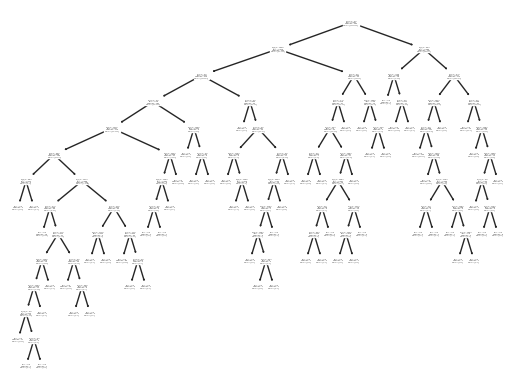

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(xTrain, yTrain)
p = tree.plot_tree(clf)

# **Mengevaluasi Hasil Pemodelan**

Cross Validation Regresi Logistik

In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.85 (+/- 0.12), Waktu = 1.286 detik


RegLog    0.744444
dtype: float64

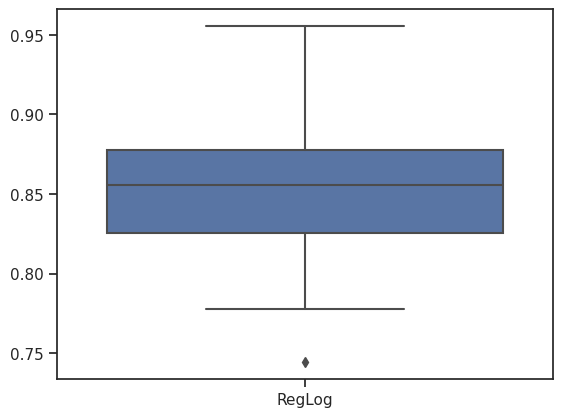

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

In [ ]:
# Hyperparameter optimization pada model Regresi Logistik menggunakan gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 10 folds for each of 17 candidates, totalling 170 fits
0.8711111111111112
{'C': 0.1}


Cross Validation Decision Tree

In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.80 (+/- 0.13), Waktu = 0.404 detik


RegLog     0.744444
DecTree    0.711111
dtype: float64

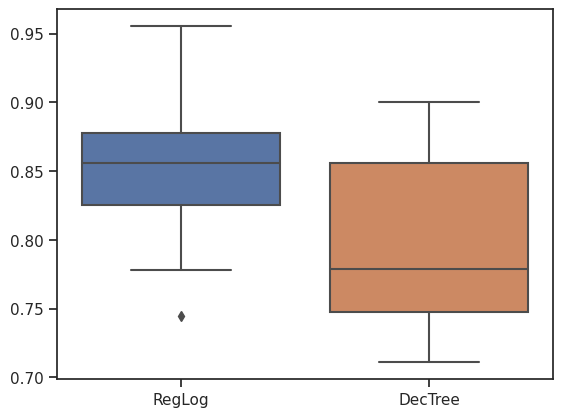

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

In [ ]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8377777777777778
{'max_depth': 3, 'criterion': 'gini'}


Accuracy RL: 0.85 (+/- 0.11)
Accuracy DT: 0.79 (+/- 0.10)


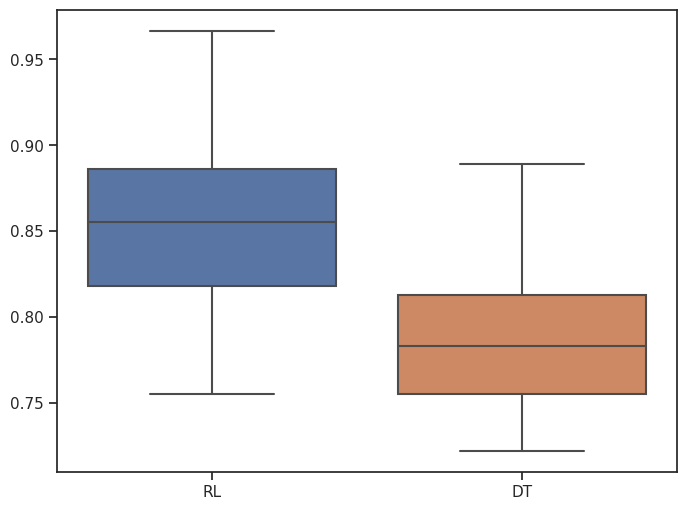

In [ ]:
kCV = 10
# Menggunakan parameter optimal
RL_opt = LogisticRegression(C= 0.1)
DT_opt = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)

# Melakukan Cross Validasi
models = ['RL', 'DT']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)

# **Kesimpulan**

Berdasarkan hasil analisis yang telah kita lakukan hingga tahap modeling, dapat disimpulkan bahwa akurasi pada model Regresi Logistik lebih baik dibandingkan dengan Decision Tree. Namun, perlu diperhatikan juga bahwa tidak selamanya model dengan akurasi yang tinggi akan selalu kita pakai, apalagi dalam konteks ini hanya berbeda sedikit (tidak terlalu signifikan). Maka, kita perlu memahami domain knowledge atau konteks analisis data kita secara lebih dalam, karena kedua model tersebut sejatinya bisa dipakai. Jadi, sesuai kebijakan atau kebutuhan kita saja ingin menggunakan model yang mana.